In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [25]:
import itertools, sys

import catboost as cb
import pandas as pd
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

wids_path = ".."
sys.path.append(wids_path)
import global_vars as gv
# from global_vars import all_feature_columns, response_column
from utils import visualize as viz

pd.set_option("display.max_columns", 500)
sns.set_context("talk")

<IPython.core.display.Javascript object>

In [60]:
seed = 0
depth = 12

model_dict = {
    "catboost": cb.CatBoostRegressor(
                loss_function="RMSE",
                depth=depth,
                random_seed=seed,
                verbose=False,
                nan_mode="Min",
            ),
    "xgboost": xgb.XGBRegressor(eval_metric= 'rmse', seed = seed, max_depth=3, n_estimators=100, 
                           booster='gbtree', n_jobs=-1,
                           random_state=0, learning_rate=0.1)
            # "xgboost": xgb.XGBRegressor()

}

model_type_dict = {
    "catboost": "catboost",
    "xgboost": "sklearn"
}

feature_dict = {
    "log_temp_pca_onehot_impute_parse_upsamplesmote_catboost": {
        "cols_to_reduce_dict": {"temp": viz.temp_col_list},
        "reduce_number_dict": {"temp": 0},
        "log10_transform_cols": ["floor_area"],
        "if_one_hot": True,
        "if_scale": False,
        "model": "catboost",
        "replace_original_feature_col_dict": {"energy_star_rating": "backfilled_energy_star_rating", "facility_type": "facility_type_parsed"},
        "drop_data": {},
        "resample_param_dict": {"up_or_downsample": "upsample", "resample_by_col": "state_factor", "resample_type": "smote"}
    },
    "log_temp_pca_onehot_impute_parse_upsample_catboost": {
        "cols_to_reduce_dict": {"temp": viz.temp_col_list},
        "reduce_number_dict": {"temp": 9},
        "log10_transform_cols": ["floor_area"],
        "if_one_hot": True,
        "if_scale": False,
        "model": "catboost",
        "replace_original_feature_col_dict": {"energy_star_rating": "backfilled_energy_star_rating", "facility_type": "facility_type_parsed"},
        "drop_data": {},
        "resample_param_dict": {"up_or_downsample": "upsample", "resample_by_col": "state_factor", "resample_type": "random"}
    },
    "log_temp1_pca_onehot_impute_parse_catboost": {
        "cols_to_reduce_dict": {"temp1": viz.temp_col_list+gv.below_temp_col_list + gv.heat_cool_col_list},
        "reduce_number_dict": {"temp1": 0},
        "log10_transform_cols": ["floor_area"],
        "if_one_hot": True,
        "if_scale": False,
        "model": "catboost",
        "replace_original_feature_col_dict": {"energy_star_rating": "backfilled_energy_star_rating", "facility_type": "facility_type_parsed"},
        "drop_data": {},
        "resample_param_dict": {}
    },
    "log_temp_below_pca_onehot_impute_catboost": {
        "cols_to_reduce_dict": {"temp": viz.temp_col_list, "below": gv.below_temp_col_list + gv.heat_cool_col_list},
        "reduce_number_dict": {"temp": 9, "below": 8},
        "log10_transform_cols": ["floor_area"],
        "if_one_hot": True,
        "if_scale": False,
        "model": "catboost",
        "replace_original_feature_col_dict": {"energy_star_rating": "backfilled_energy_star_rating"},
        "drop_data": {},
        "resample_param_dict": {}
    },
    "log_temp_pca_onehot_impute_v1_parse_catboost": {
        "cols_to_reduce_dict": {"temp": viz.temp_col_list},
        "reduce_number_dict": {"temp": 9},
        "log10_transform_cols": ["floor_area"],
        "if_one_hot": True,
        "if_scale": False,
        "model": "catboost",
        "replace_original_feature_col_dict": {"energy_star_rating": "backfilled_energy_star_rating_v1", "facility_type": "facility_type_parsed"},
        "drop_data": {},
        "resample_param_dict": {}
    },
     "log_temp_pca_onehot_impute_parse_xgb": {
        "cols_to_reduce_dict": {"temp": viz.temp_col_list},
        "reduce_number_dict": {"temp": 9},
        "log10_transform_cols": ["floor_area"],
        "if_one_hot": True,
        "if_scale": False,
        "model": "xgboost",
        "replace_original_feature_col_dict": {"energy_star_rating": "backfilled_energy_star_rating", "facility_type": "facility_type_parsed"},
        "drop_data": {},
        "resample_param_dict": {}
    },
    "log_temp_pca_onehot_impute_parse_catboost": {
        "cols_to_reduce_dict": {"temp": viz.temp_col_list},
        "reduce_number_dict": {"temp": 9},
        "log10_transform_cols": ["floor_area"],
        "if_one_hot": True,
        "if_scale": False,
        "model": "catboost",
        "replace_original_feature_col_dict": {"energy_star_rating": "backfilled_energy_star_rating", "facility_type": "facility_type_parsed"},
        "drop_data": {},
        "resample_param_dict": {}
    },
    "log_temp_pca_onehot_impute_catboost_scale": {
        "cols_to_reduce_dict": {"temp": viz.temp_col_list},
        "reduce_number_dict": {"temp": 9},
        "log10_transform_cols": ["floor_area"],
        "if_one_hot": True,
        "if_scale": True,
        "model": "catboost",
        "replace_original_feature_col_dict": {"energy_star_rating": "backfilled_energy_star_rating"},
        "drop_data": {},
        "resample_param_dict": {}
    },
    "log_temp_pca_onehot_impute_catboost": {
        "cols_to_reduce_dict": {"temp": viz.temp_col_list},
        "reduce_number_dict": {"temp": 9},
        "log10_transform_cols": ["floor_area"],
        "if_one_hot": True,
        "if_scale": False,
        "model": "catboost",
        "replace_original_feature_col_dict": {"energy_star_rating": "backfilled_energy_star_rating"},
        "drop_data": {},
        "resample_param_dict": {}
    },
    "log_temp_pca_onehot_impute_xgb": {
        "cols_to_reduce_dict": {"temp": viz.temp_col_list},
        "reduce_number_dict": {"temp": 9},
        "log10_transform_cols": ["floor_area"],
        "if_one_hot": True,
        "if_scale": False,
        # "backfill_dict": {
        #     "energy_star_rating": ["state_factor", "building_class", "facility_type"]
        # },
        "model": "xgboost",
        "replace_original_feature_col_dict": {"energy_star_rating": "backfilled_energy_star_rating"},
        "drop_data": {},
        "resample_param_dict": {}
    },
    "log_temp_pca_onehot_xgb": {
        "cols_to_reduce_dict": {"temp": viz.temp_col_list},
        "reduce_number_dict": {"temp": 9},
        "log10_transform_cols": ["floor_area"],
        "if_one_hot": True,
        "if_scale": False,
        "backfill_dict": {},
        "model": "xgboost",
        "replace_original_feature_col_dict": [],
        "drop_data": {},
        "resample_param_dict": {}
    },
    
}

<IPython.core.display.Javascript object>

In [61]:
def combine_rmse_results(config_name_list):
    rmse_df = pd.DataFrame()
    for config_name in config_name_list:
        try:
            _df = pd.read_csv(
                f"{wids_path}/validation_result/hannah/{config_name}.csv"
            ).assign(config=config_name)
            rmse_df = pd.concat([rmse_df, _df], axis=0)
        except:
            print(f"{config_name}.csv not found")
        rmse_df = rmse_df.reset_index(drop=True)
    return rmse_df

<IPython.core.display.Javascript object>

In [62]:
len(list(feature_dict.keys()))

11

<IPython.core.display.Javascript object>

In [63]:
rmse_df = combine_rmse_results(feature_dict.keys())

log_temp_pca_onehot_impute_xgb.csv not found
log_temp_pca_onehot_xgb.csv not found


<IPython.core.display.Javascript object>

In [64]:
def plot_train_and_test_rmse(rmse_df):
    fig, axes = plt.subplots(figsize=(11, 9), nrows=2)
    sns.boxplot(
        data=rmse_df.query("method == 'loyo'").sort_values("config"),
        x="config",
        y="train_rmse",
        # hue="depth",
        ax=axes[0],
    )
    viz.add_median_labels(axes[0])
    sns.scatterplot(
        data=rmse_df.query("method == 'whole train'").sort_values(
            "config"
        ),
        x="config",
        y="train_rmse",
        ax=axes[0],
        color="white",
        edgecolor="k",
        label="whole train",
        # hue="depth",
    )
    _ = axes[0].set_xticklabels([])
    axes[0].legend(bbox_to_anchor=(1, 1))

    sns.boxplot(
        data=rmse_df.sort_values("config"),
        x="config",
        y="test_rmse",
        # hue="depth",
        ax=axes[1],
    )
    _ = axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
    axes[1].legend(bbox_to_anchor=(1, 1))
    viz.add_median_labels(axes[1])
    fig.subplots_adjust(hspace=0)
    # fig.suptitle(f"Seed {seed}")

<IPython.core.display.Javascript object>

No handles with labels found to put in legend.


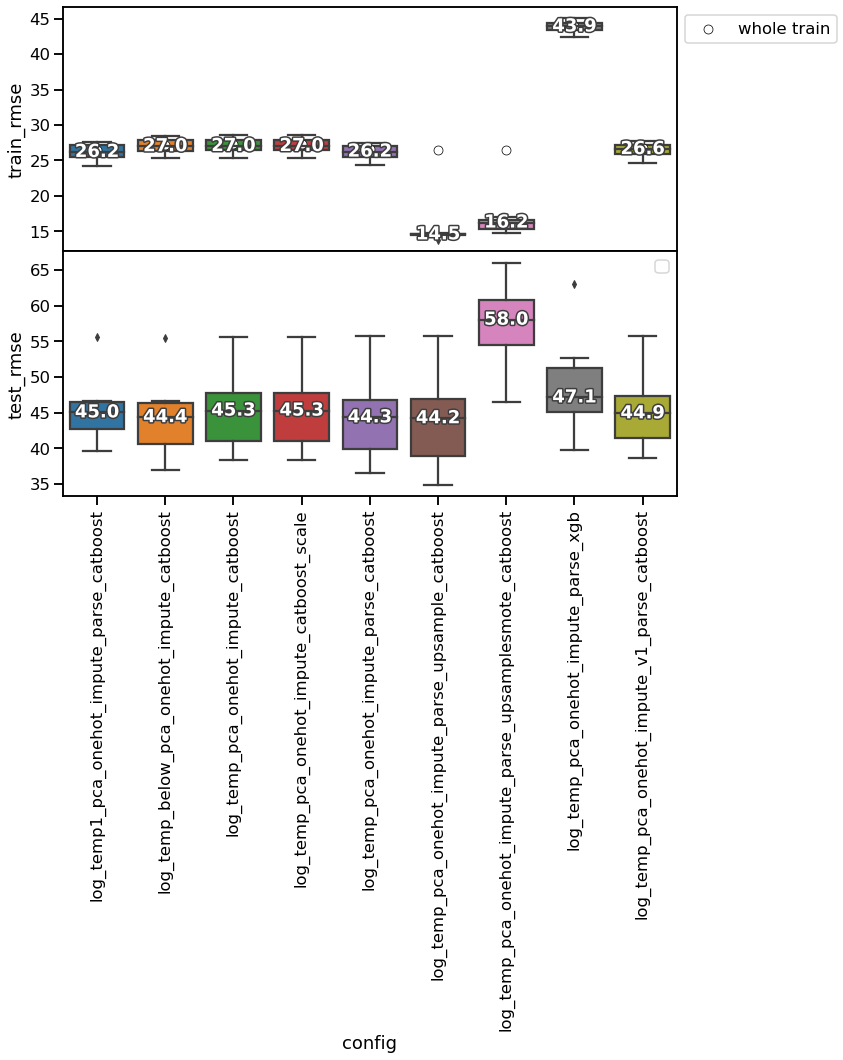

<IPython.core.display.Javascript object>

In [65]:
plot_train_and_test_rmse(rmse_df)

In [35]:
rmse_df.query("method == 'whole train'")

,left_out_year,train_rmse,test_rmse,method,config
6,0.0,26.603272,NaN,whole train,log_temp_pca_onehot_impute_parse_catboost
13,0.0,27.313756,NaN,whole train,log_temp_pca_onehot_impute_catboost_scale
20,0.0,27.313756,NaN,whole train,log_temp_pca_onehot_impute_catboost


<IPython.core.display.Javascript object>